In [1]:
import pandas as pd
import os
import glob
import csv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
res = pd.read_csv("reinforce_results.csv")
res.drop(columns={"Unnamed: 0"}, inplace=True)

In [3]:
res

,gamma,alpha,episodes,steps,cleaned
0,0.90,0.001,20.0,40.0,42.051282
1,0.90,0.001,20.0,40.0,30.256410
2,0.90,0.001,20.0,40.0,44.615385
3,0.90,0.001,20.0,60.0,36.410256
4,0.90,0.001,20.0,60.0,32.307692
...,...,...,...,...,...
238,0.99,0.100,60.0,60.0,48.717949
239,0.99,0.100,60.0,60.0,38.461538
240,0.99,0.100,60.0,100.0,24.615385
241,0.99,0.100,60.0,100.0,46.666667


In [4]:
agg = res.groupby(['gamma', 'alpha', 'steps', 'episodes']).mean().reset_index()

In [5]:
agg.sort_values(by='cleaned')

,gamma,alpha,steps,episodes,cleaned
71,0.99,0.010,100.0,60.0,31.111111
57,0.99,0.001,60.0,20.0,31.623932
62,0.99,0.001,100.0,60.0,31.623932
27,0.95,0.001,40.0,20.0,33.333333
32,0.95,0.001,60.0,60.0,34.017094
...,...,...,...,...,...
63,0.99,0.010,40.0,20.0,54.700855
46,0.95,0.100,40.0,40.0,54.700855
72,0.99,0.100,40.0,20.0,55.726496
70,0.99,0.010,100.0,40.0,55.726496


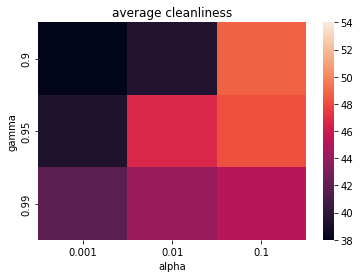

In [6]:
gropued = agg.groupby(['gamma','alpha'])
avg_cln = gropued['cleaned'].mean().unstack()
sns.heatmap(avg_cln, vmin=38, vmax=54)
plt.title("average cleanliness")
plt.show()

In [7]:
import copy
d = copy.deepcopy(agg)
d = d[d['gamma']==0.9]
d = d[d['alpha']==0.1]
d

,gamma,alpha,steps,episodes,cleaned
18,0.9,0.1,40.0,20.0,44.957265
19,0.9,0.1,40.0,40.0,45.982906
20,0.9,0.1,40.0,60.0,52.820513
21,0.9,0.1,60.0,20.0,44.102564
22,0.9,0.1,60.0,40.0,50.598291
23,0.9,0.1,60.0,60.0,51.965812
24,0.9,0.1,100.0,20.0,55.897436
25,0.9,0.1,100.0,40.0,42.393162
26,0.9,0.1,100.0,60.0,49.914530


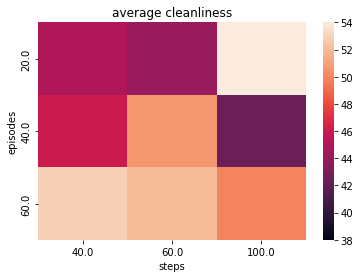

In [8]:
gropued = d.groupby(['episodes','steps'])
avg_cln = gropued['cleaned'].mean().unstack()
sns.heatmap(avg_cln, vmin=38, vmax=54)
plt.title("average cleanliness")
plt.show()